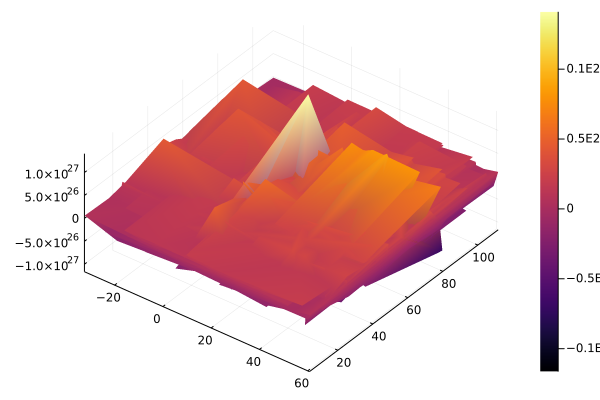

In [188]:
# Train data
using Distributions
N = 50; D = 2
μ = [25; 50]; Σ = [600 90; 90 400]; Λ = inv(Σ); 
Xᵗ = rand(MvNormal(μ, Σ), N)

# Hyperparameter
W = [0.0005 0; 0 0.0005]; ν = 2

# Training
invŴ, ν̂ = ((Xᵗ.-μ)*(Xᵗ.-μ)'.+inv(W), N+ν)
Ŵ = inv(invŴ)

# Prediction
μₛ, Λ̂ₛ, ν̂ₛ = (μ, (1-D+ν̂)*Ŵ, 1-D+ν̂)

# Test data
Xᵖ = rand(MvNormal(μ, Σ), 50)

# Plot
using SpecialFunctions, Plots, LinearAlgebra
St(D, x, μ, Λ, υ) = (gamma((υ+D)/2)*det(Λ)^0.5)/(gamma((υ+D)/2)*(π*υ)^(D/2)) * ((1.0.+1/υ*(x.-μ)'*Λ*(x.-μ))^(-(ν+D)/2))
p̂ = St(D, Xᵖ, μₛ, Λ̂ₛ, ν̂ₛ)
surface(Xᵖ[1,:], Xᵖ[2,:], p̂, camera=(40,70))

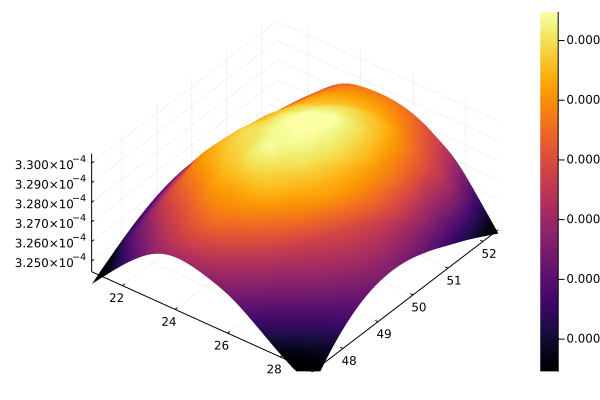

In [165]:
p = pdf(MvNormal(μ, Σ), Xᵖ)
surface(Xᵖ[1,:], Xᵖ[2,:], p, camera=(40,70))